In [1]:
import numpy #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense layer is the regular deeply connected neural network layer
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot encoding

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape) 
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[4]

9

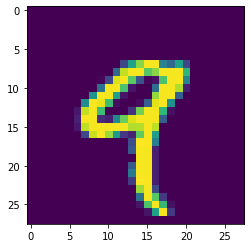

In [9]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[4])

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [11]:
number_of_classes = 10 
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [25]:
model = Sequential() 
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
  79/1875 [>.............................] - ETA: 2:52 - loss: 2.5709 - accuracy: 0.7801

KeyboardInterrupt: 

In [18]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.1294371783733368, 0.9764000177383423]


In [23]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 19ms/step
[[4.5687618e-13 5.9025648e-22 7.1883889e-08 5.1374412e-14 1.3733856e-24
  3.7506305e-19 5.2992989e-25 9.9999988e-01 5.3462899e-15 5.1816440e-15]
 [7.3259346e-15 2.4854500e-15 1.0000000e+00 9.9556099e-14 6.4678643e-19
  7.2409978e-23 1.6121699e-11 4.1527973e-23 5.0273543e-17 1.2574639e-27]
 [8.4888806e-12 9.9999988e-01 2.2867352e-08 3.8180716e-13 1.2913053e-07
  2.3710237e-10 7.1395834e-11 9.4365710e-11 2.4147187e-10 3.5903036e-14]
 [1.0000000e+00 5.0573171e-19 2.4523991e-10 1.1419164e-18 2.7945199e-15
  6.7695657e-16 5.8320619e-11 8.0911400e-17 5.9418139e-12 1.1975823e-09]]


In [17]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save('models/mnistCNN.h5')